In [654]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [655]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [656]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)

    amount_nan = df.isnull().sum()
    amount_nan = amount_nan[amount_nan > 0].sort_values(ascending=False)
    
    return pd.DataFrame(zip(percent_nan, amount_nan), index=percent_nan.index, columns=['NaN %', 'NaN Amount'])

In [657]:
def remove_less_counts(df, feature, counts):
    value_counts = df[feature].value_counts()
    valid_values = value_counts[value_counts >= counts].index

    return df[df[feature].isin(valid_values)]

In [658]:
def grouping(df, feature, category, *subcategory):
    print(dict.fromkeys(subcategory, category))
    
    return df[feature].replace(dict.fromkeys(subcategory, category))

# IMPORTING DATA

In [659]:
df_sub = pd.read_csv("Data/sample_submission.csv")
df_sub.head()

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,0
4,140704,0


In [660]:
df_train = pd.read_csv('Data/train.csv')
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [661]:
df_test = pd.read_csv('Data/test.csv')
df_test.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


<div class="alert alert-info">
    
The nature of some of the features like **Academic Pressure and Work Pressure, or Study Satisfaction and Job Satisfaction** is very similar and can be processed into new features to get rid of the multiple Null values shown in these ones.

**CGPA** also needs treatment, setting the null values as 0 for those who are signed as workers.

Others like **Sleep Duration** will have to be treated as categorical and **encoded.**

</div>

In [662]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [663]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

There are Null values to be treated, as stated avobe.

In [664]:
df_train.isnull().sum()

id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

<div class="alert alert-info">
    
As it was seen before, Academic Pressure, Work Pressure, CGPA, Study Satisfaction and Job Satisfaction can be separated into diferent features to get rid of the null values.

Dietary Habits, Degree and Financial Stress have just a few null values, and given the total amount of rows in our data, **they can be discarded**.

</div>

I will do all of this after analizing the feature relationships.

# UNNECESARY FEATURES

Both the id and name columns are not useful for the modelization of the data.

In [665]:
df_train = df_train.drop(['id', 'Name'], axis=1)
df_train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [666]:
df_test = df_test.drop(['id', 'Name'], axis=1)

Let's **create a variable with the reamining categorical features**, it will surely be useful later...

In [667]:
categorical_features = ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 
                        'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 
                        'Family History of Mental Illness']

# EDA

In [668]:
df_train.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,140700.000000,27897.000000,112782.000000,27898.000000,27897.000000,112790.000000,140700.000000,140696.000000,140700.000000
mean,40.388621,3.142273,2.998998,7.658636,2.944940,2.974404,6.252679,2.988983,0.181713
std,12.384099,1.380457,1.405771,1.464466,1.360197,1.416078,3.853615,1.413633,0.385609
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


<div class="alert alert-info">
    
This study is only aplicable for people under 60 and above 18.

The academic and work presure range between 1 and 5. The same happens with study and job satisfaction, and with financial stress.

</div>

In [669]:
df_test.describe()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
count,93800.000000,18767.000000,75022.000000,18766.000000,18767.000000,75026.00000,93800.000000,93800.000000
mean,40.321685,3.158576,3.011797,7.674016,2.939522,2.96092,6.247335,2.978763
std,12.393480,1.386666,1.403563,1.465056,1.374242,1.41071,3.858191,1.414604
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.00000,0.000000,1.000000
25%,29.000000,2.000000,2.000000,6.330000,2.000000,2.00000,3.000000,2.000000
50%,42.000000,3.000000,3.000000,7.800000,3.000000,3.00000,6.000000,3.000000
75%,51.000000,4.000000,4.000000,8.940000,4.000000,4.00000,10.000000,4.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.00000,12.000000,5.000000


<div class="alert alert-success">
    
Both train and test DF have similar values for their means and std.

Max and min values are the same in both datasets, hence there are no extreme values that would not fit the training of the model.

</div>

## Unique Values

In [670]:
df_train.nunique()

Gender                                     2
Age                                       43
City                                      98
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     331
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            36
Dietary Habits                            23
Degree                                   115
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
Depression                                 2
dtype: int64

In [671]:
df_test.nunique()

Gender                                     2
Age                                       44
City                                      68
Working Professional or Student            2
Profession                                64
Academic Pressure                          5
Work Pressure                              5
CGPA                                     326
Study Satisfaction                         5
Job Satisfaction                           5
Sleep Duration                            31
Dietary Habits                            22
Degree                                    87
Have you ever had suicidal thoughts ?      2
Work/Study Hours                          13
Financial Stress                           5
Family History of Mental Illness           2
dtype: int64

<div class="alert alert-info">

It can be seen how City, Dietary Habits, Sleep Duration and Degree may not share the same categories in df_train and df_test.

</div>

Let's check it out:

In [672]:
for c in categorical_features:
    A = df_train[c].astype('str').unique()
    B = df_test[c].astype('str').unique()
    
    C = np.setdiff1d(B,A)
    
    
    if len(C) > 0:
        print(f"{color.BOLD}{c}{color.END}: Test has categories {color.BLUE}{C}{color.END} which are not in train.\n")
        print(f" => {len(df_test.loc[df_test[c].astype(str).isin(C)])} rows\n")

City: Test has categories ['Abhinav' 'Aditi' 'Avni' 'Chemist' 'Ghopal' 'Golkata' 'Hrithik' 'Ira'
 'Is Kanpur' 'Lawyer' 'Leela' 'Less than 5 hours' 'Malyan' 'Mhopal'
 'More Delhi' 'No.12' 'Pratham' 'Rolkata' 'San Vasai-Virar' 'Sara'
 'Saurav' 'Siddhesh' 'Thani' 'Unaly' 'Vaikot' 'Vikram'] which are not in train.

 => 30 rows

Profession: Test has categories ['24th' '3M' 'B.Pharm' 'City Consultant' 'M.Pharm' 'M.Tech' 'MCA' 'MD'
 'ME' 'Manvi' 'Name' 'No' 'Samar' 'Simran' 'Surat' 'Surgeon' 'Unhealthy'] which are not in train.

 => 20 rows

Sleep Duration: Test has categories ['0' '20-21 hours' '50-75 hours' '6 hours' '60-65 hours' '8-89 hours'
 '9-10 hours' 'Have_you_ever_had_suicidal_thoughts' 'Meerut' 'Vivan'] which are not in train.

 => 11 rows

Dietary Habits: Test has categories ['5 Healthy' '5 Unhealthy' 'Academic' 'Educational' 'Kolkata' 'MCA'
 'Mealy' 'Naina' 'Prachi' 'Raghav' 'Resistant' 'Soham' 'Vivaan'] which are not in train.

 => 13 rows

Degree: Test has categories ['3.0' '5.

<div class="alert alert-danger">

Seems like these unique categories in the test data set are only present in a few rows. **I will check it later when cleaning the data and decide wether I just remove them**.

</div>

Let's first analyze the 'Profession' feature:

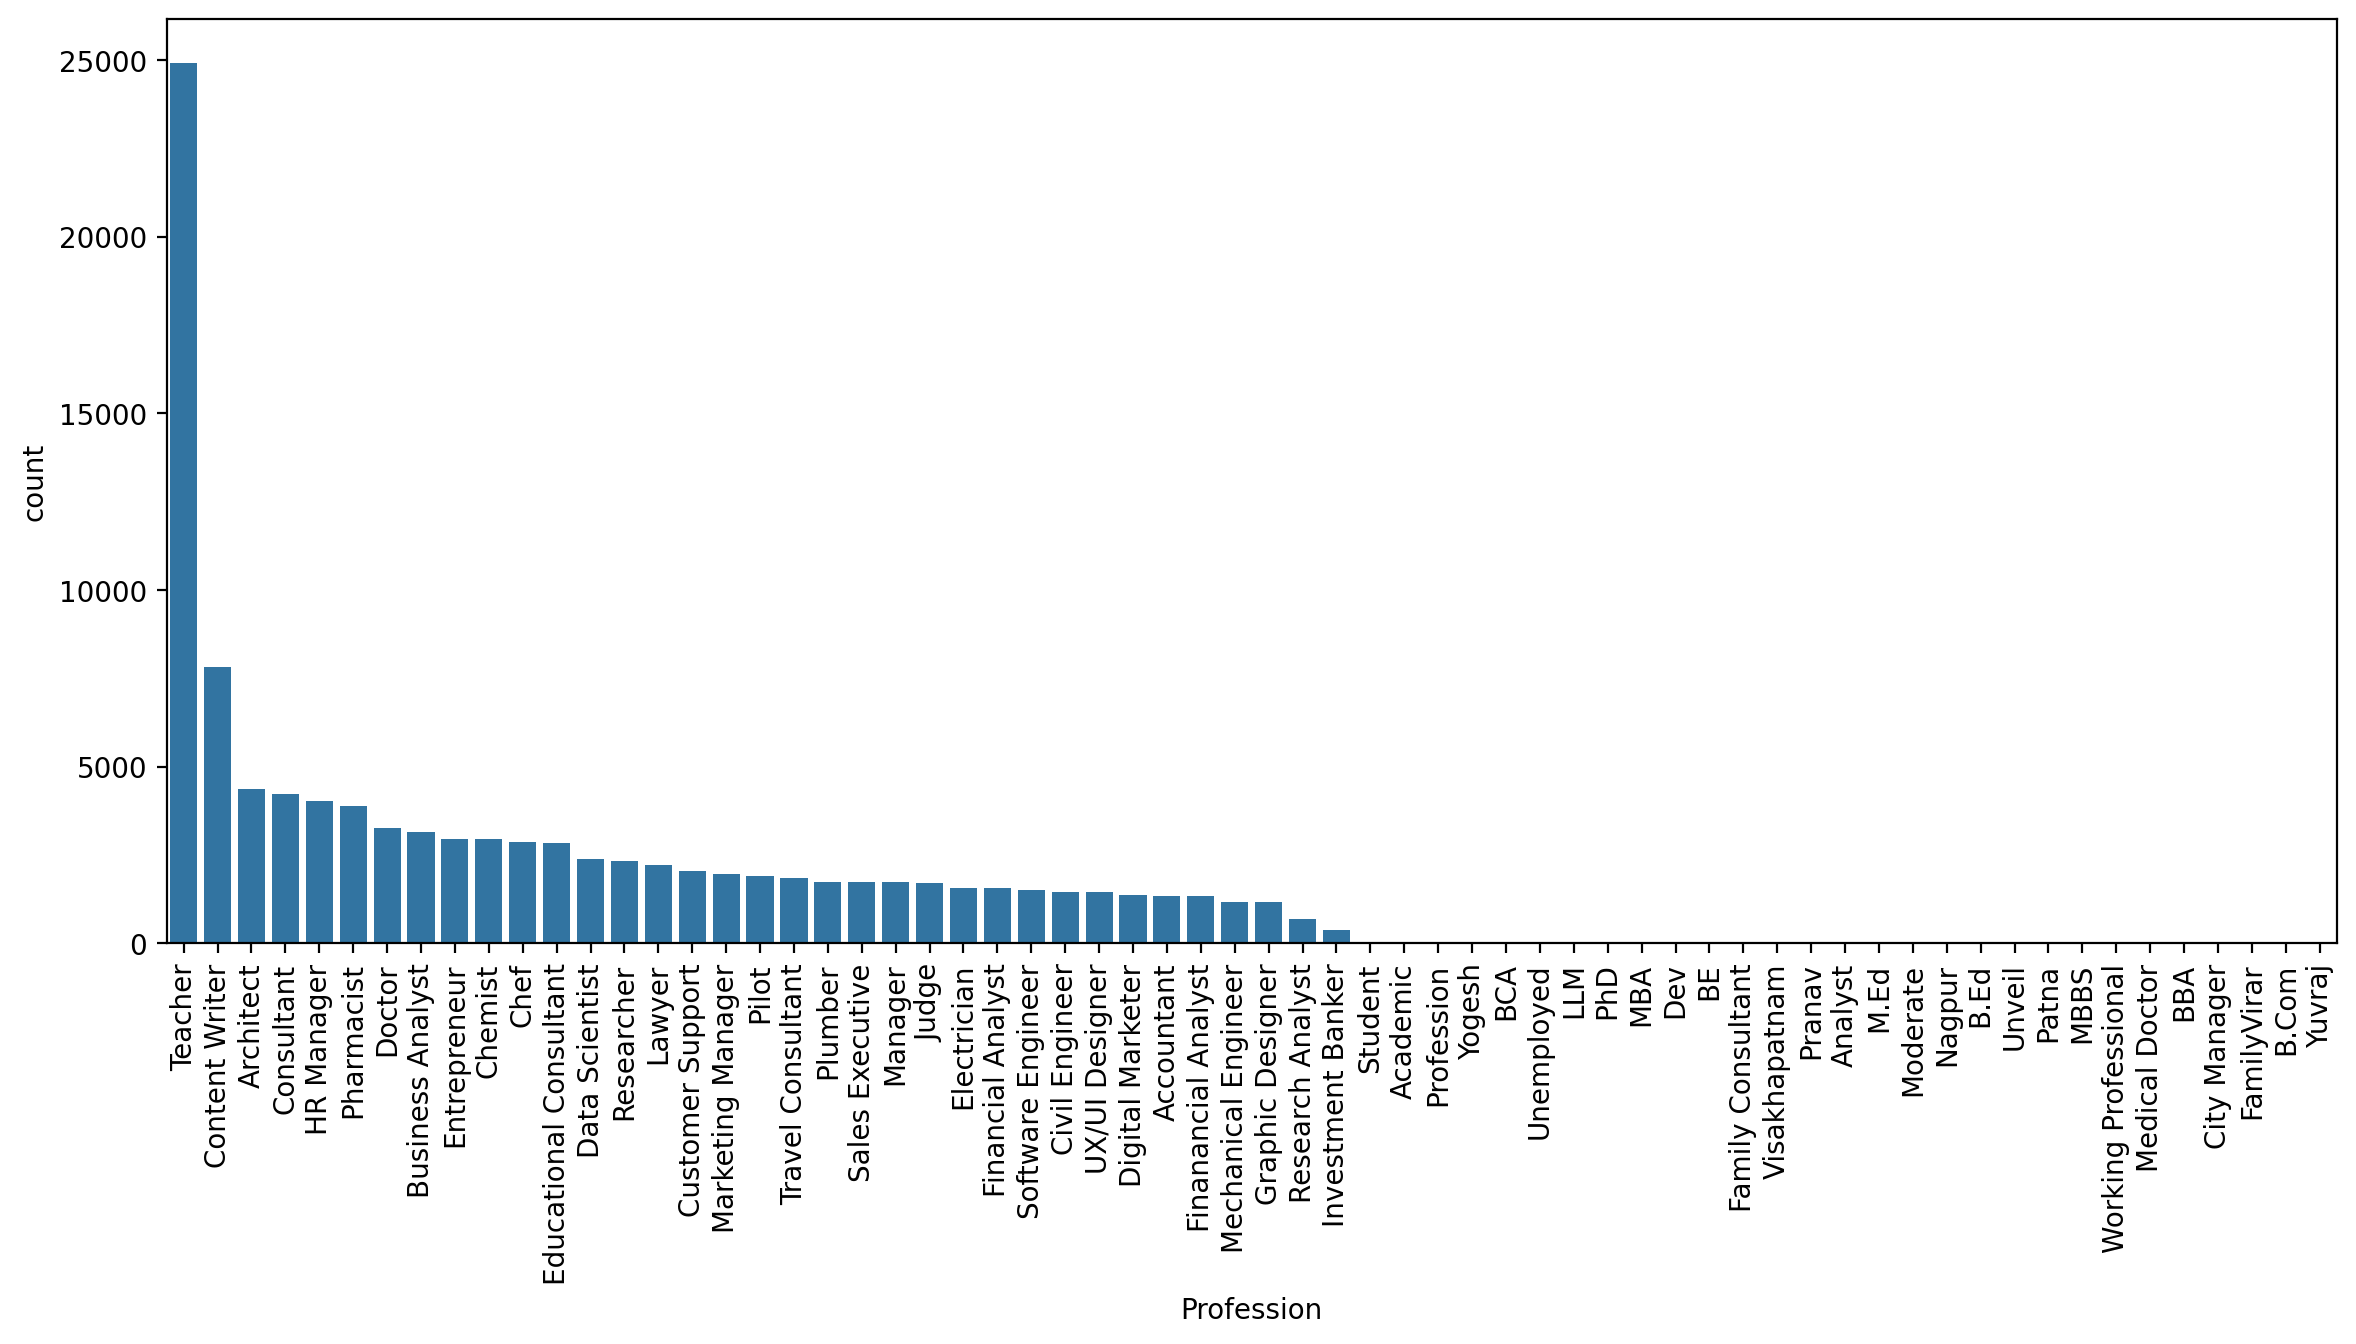

In [673]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(df_train["Profession"].value_counts())
plt.xticks(rotation=90);

<div class="alert alert-info">

The data collection was heavily populated by teachers, which is to be considered when showing the final results.

**There are separated categories that could be merged into the same**, such as PhD and Researcher, or MBA and Student, Dev and Software Engineer, etc.

**Other like 'Student' into which NaN values could be added.**

**Others like Profession may be considered as Null values and deleted.**

</div>

Now let's go for 'Dietary Habits':

In [674]:
df_train['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

<div class="alert alert-info">

I will leave only three categories: Moderate, Unhealthy and Healthy. For that **I am including some of the small ones into those three and removing the rest that don't make sense.**

</div>

Now let's go for 'City':

In [675]:
df_train['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [676]:
len(df_train['City'].value_counts()[df_train['City'].value_counts() < 1000])

68

In [677]:
df_train['City'].value_counts()[df_train['City'].value_counts() > 1000].index.unique()

Index(['Kalyan', 'Patna', 'Vasai-Virar', 'Kolkata', 'Ahmedabad', 'Meerut',
       'Ludhiana', 'Pune', 'Rajkot', 'Visakhapatnam', 'Srinagar', 'Mumbai',
       'Indore', 'Agra', 'Surat', 'Varanasi', 'Vadodara', 'Hyderabad',
       'Kanpur', 'Jaipur', 'Thane', 'Lucknow', 'Nagpur', 'Bangalore',
       'Chennai', 'Ghaziabad', 'Delhi', 'Bhopal', 'Faridabad', 'Nashik'],
      dtype='object', name='City')

<div class="alert alert-info">

In the case of 'City', we could **remove the cities with less than 1000 entries**, as they represent a small portion of the data set.

Also **needs cleaning**.

</div>

Now let's go for 'Sleep Duration':

In [678]:
df_train['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

<div class="alert alert-info">

Needs **cleaning.**

These categories can be reduced to the most populated ones.

</div>

## Relevant plotting

**WORKING ON IT...**

In [679]:
df_train.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


Work pressure - profession, hue gender and age

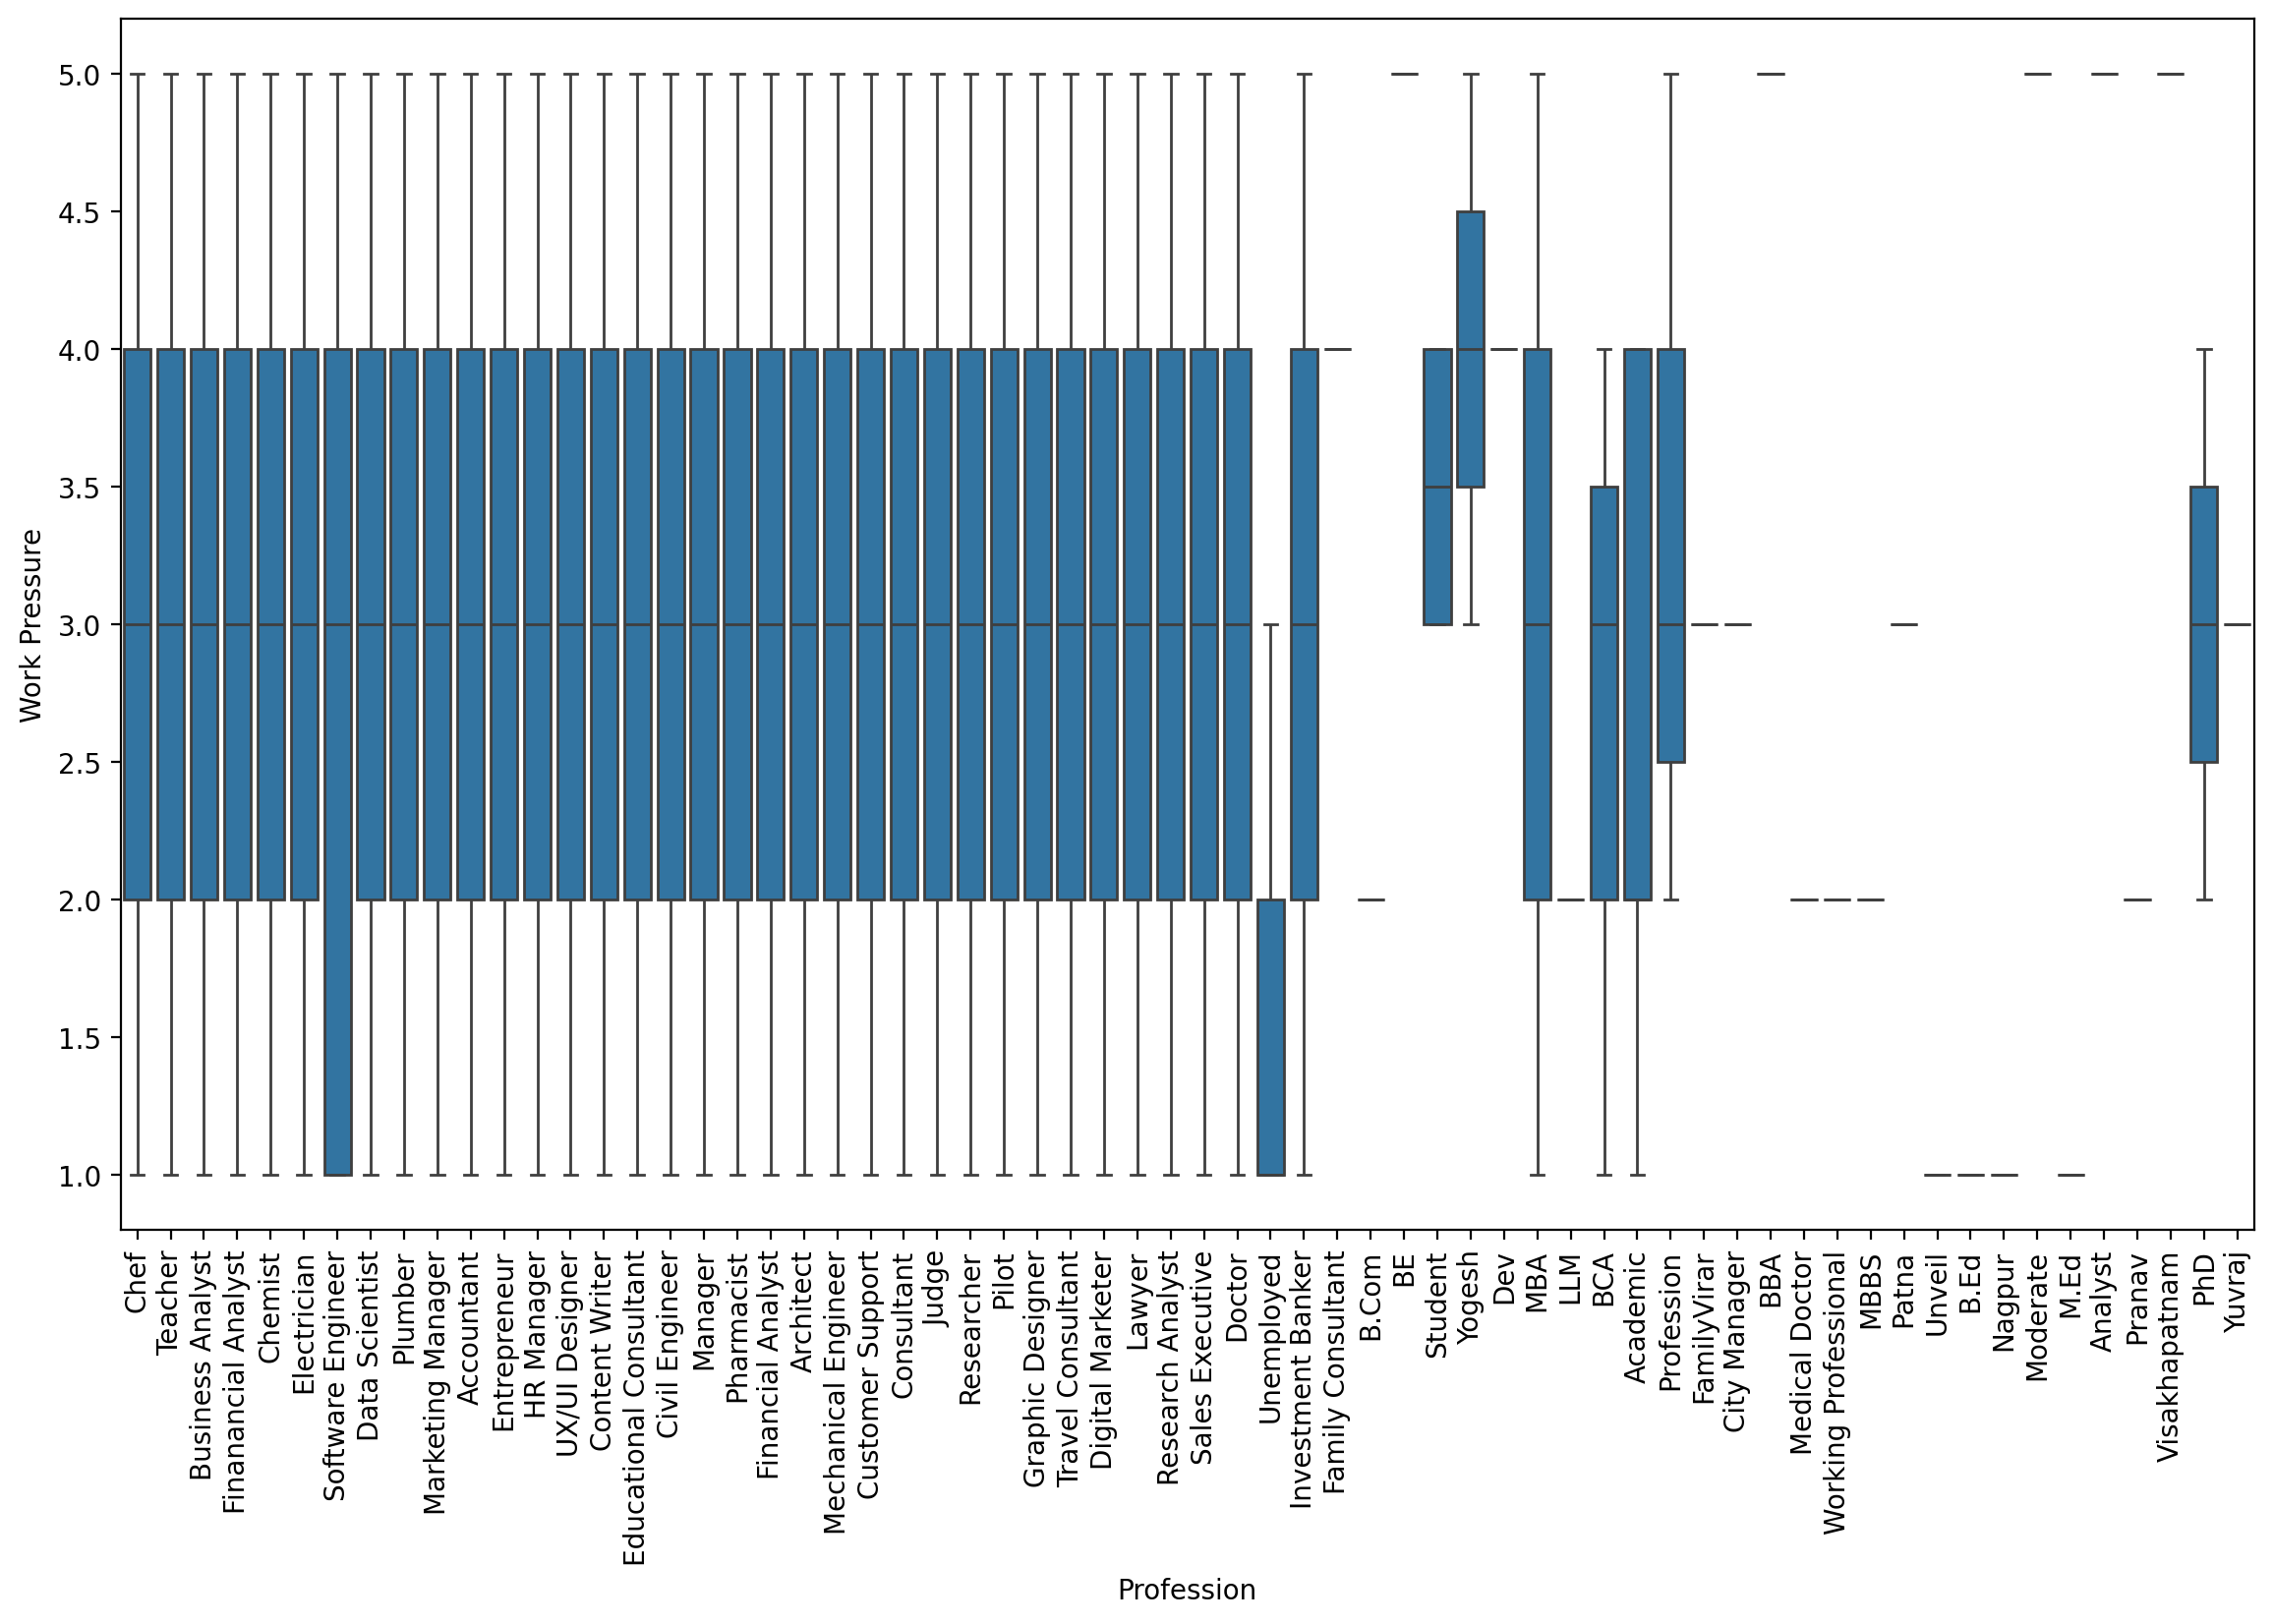

In [680]:
plt.figure(figsize=(14,8), dpi=200)
sns.boxplot(df_train, x='Profession', y='Work Pressure')
plt.xticks(rotation=90);

Job satisfaction - profession, hue gender and age

Academic pressure - degree, hue gender and age

Study satisfaction - degree, hue gender and age

Depression - every feature

Sleep duration - working professional or student, hue depression

Work hours - profession, hue depression

Study hours - degree, hue depression

## Balanced Label

In [681]:
df_train['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

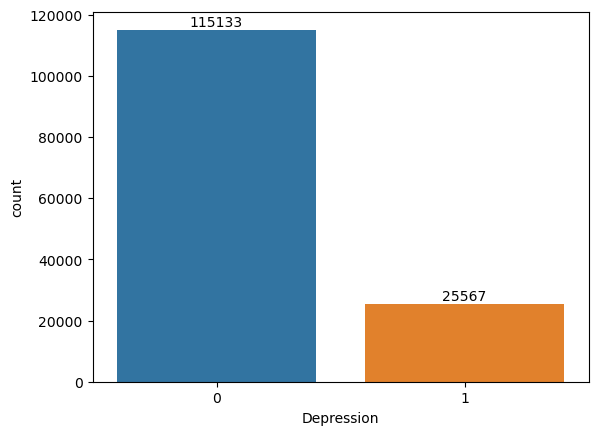

In [682]:
ax = sns.countplot(x=df_train['Depression'], hue=df_train['Depression'], legend=False)

for i, v in enumerate(df_train['Depression'].unique()):
    ax.bar_label(ax.containers[i])

<div class="alert alert-danger">

Label is imbalanced towards no depression, therefore accuracy is not a valid metric and **I will apply stratification** to mantain proportion on the folds.

The imbalance is of the order of 5 to 1, therefore **I will consider it given the final metrics are not good**.

</div>

## Correlation

In [683]:
from dython.nominal import associations

In [684]:
associations_df = associations(df_train, nominal_columns="all", plot=False)
corr_matrix = associations_df['corr']

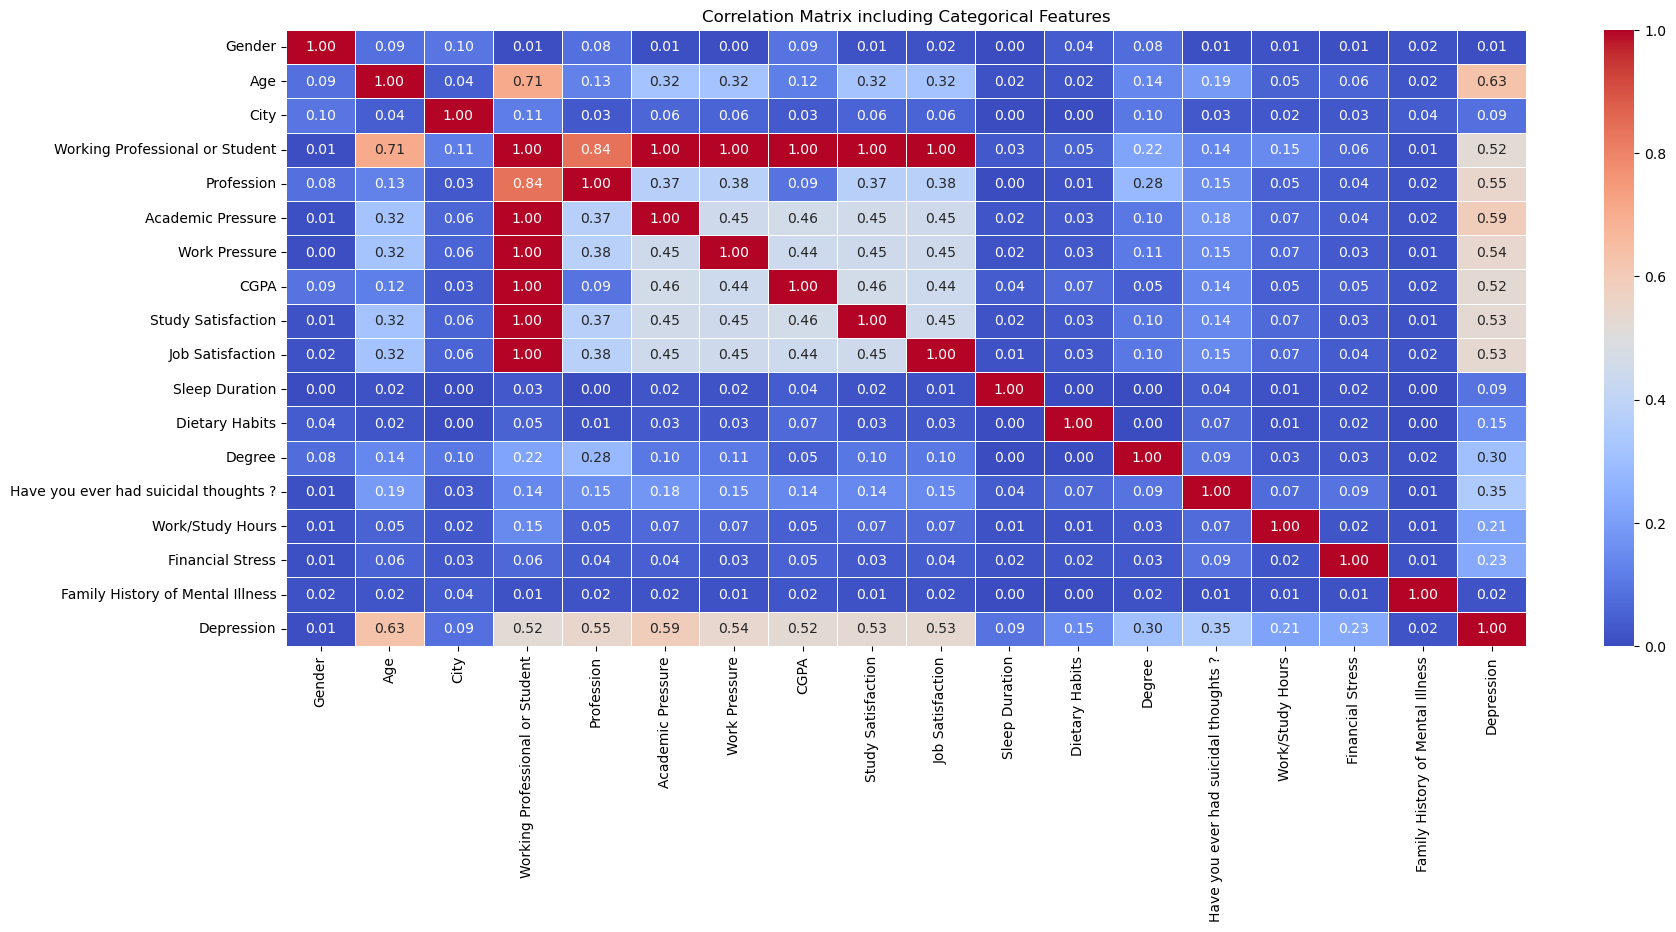

In [685]:
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix including Categorical Features')
plt.show()

In [686]:
corr_matrix["Depression"].sort_values(ascending=False)

Depression                               1.000000
Age                                      0.631711
Academic Pressure                        0.588041
Profession                               0.546424
Work Pressure                            0.541478
Job Satisfaction                         0.534074
Study Satisfaction                       0.529487
CGPA                                     0.524434
Working Professional or Student          0.520762
Have you ever had suicidal thoughts ?    0.349038
Degree                                   0.304660
Financial Stress                         0.234291
Work/Study Hours                         0.211792
Dietary Habits                           0.151977
Sleep Duration                           0.092171
City                                     0.085452
Family History of Mental Illness         0.016266
Gender                                   0.007676
Name: Depression, dtype: float64

<div class="alert alert-info">

Down to **Working Professional or Student** the features have considerable amount of correlation to the label and therefore a more careful cleaning, followed by **Degree** and finally **Dietary Habits, Sleep Duration and City**.

</div>

# Feature Engineering

## Duplicates 

In [687]:
print("Number of duplicates in train data: ", len(df_train[df_train.duplicated()]))

Number of duplicates in train data:  5


In [688]:
print("Number of duplicates in test data: ", len(df_test[df_test.duplicated()]))

Number of duplicates in test data:  4


In [689]:
df_train[df_train.duplicated()]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
94630,Male,18.0,Vasai-Virar,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,7-8 hours,Unhealthy,Class 12,Yes,11.0,5.0,No,1
99689,Male,38.0,Meerut,Working Professional,NaN,NaN,2.0,NaN,NaN,2.0,7-8 hours,Moderate,Class 12,Yes,5.0,3.0,No,0
105130,Male,19.0,Bangalore,Working Professional,NaN,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,Class 12,Yes,12.0,5.0,No,1
115007,Female,18.0,Lucknow,Working Professional,NaN,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Healthy,Class 12,Yes,11.0,5.0,Yes,1
121194,Male,18.0,Ludhiana,Working Professional,NaN,NaN,5.0,NaN,NaN,2.0,Less than 5 hours,Unhealthy,Class 12,Yes,12.0,5.0,Yes,1


In [690]:
df_test[df_test.duplicated()]

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
21733,Female,18.0,Ludhiana,Working Professional,NaN,NaN,4.0,NaN,NaN,1.0,Less than 5 hours,Unhealthy,Class 12,Yes,8.0,2.0,Yes
51504,Female,18.0,Chennai,Working Professional,NaN,NaN,4.0,NaN,NaN,2.0,7-8 hours,Moderate,Class 12,Yes,11.0,3.0,No
51658,Male,49.0,Lucknow,Working Professional,Content Writer,NaN,2.0,NaN,NaN,1.0,Less than 5 hours,Moderate,B.Ed,Yes,4.0,1.0,No
62134,Female,56.0,Indore,Working Professional,Teacher,NaN,2.0,NaN,NaN,1.0,More than 8 hours,Moderate,LLB,Yes,7.0,2.0,No


<div class="alert alert-info">

*Even though there are duplicates in the test set, I cannot remove them since the final evaluation in Kaggle requires the final predictions of the test data set to keep its dimension.*

</div>

In [691]:
df_train_no_dp = df_train.drop(df_train[df_train.duplicated()].index, axis=0)

In [692]:
# df_test_no_dp = df_test.drop(df_test[df_test.duplicated()].index, axis=0)

## Missing Values and Cleaning

### Train Set

In [693]:
df_train_NaN = df_train_no_dp.copy()

In [694]:
df_train_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [695]:
percent_missing(df_train_NaN)

,NaN %,NaN Amount
Academic Pressure,80.172003,112798
Study Satisfaction,80.172003,112798
CGPA,80.171293,112797
Profession,26.031487,36625
Work Pressure,19.842923,27918
Job Satisfaction,19.837237,27910
Dietary Habits,0.002843,4
Financial Stress,0.002843,4
Degree,0.001422,2


In [696]:
df_train_NaN['Academic Pressure'] = np.where(df_train_NaN['Working Professional or Student'] == 'Working Professional', 0, df_train_NaN['Academic Pressure'])
df_train_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [697]:
df_train_NaN['Work Pressure'] = np.where(df_train_NaN['Working Professional or Student'] == 'Student', 0, df_train_NaN['Work Pressure'])
df_train_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [698]:
percent_missing(df_train_NaN)

,NaN %,NaN Amount
Study Satisfaction,80.172003,112798
CGPA,80.171293,112797
Profession,26.031487,36625
Job Satisfaction,19.837237,27910
Work Pressure,0.014215,20
Academic Pressure,0.006397,9
Dietary Habits,0.002843,4
Financial Stress,0.002843,4
Degree,0.001422,2


<div class="alert alert-info">

The few null values remaining in 'Work Pressure' and 'Academic Pressure' **will need to be imputed**.

</div>

In [699]:
df_train_NaN['Study Satisfaction'] = np.where(df_train_NaN['Working Professional or Student'] == 'Working Professional', 0, df_train_NaN['Study Satisfaction'])
df_train_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,NaN,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,NaN,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,NaN,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,NaN,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [700]:
df_train_NaN['Job Satisfaction'] = np.where(df_train_NaN['Working Professional or Student'] == 'Student', 0, df_train_NaN['Job Satisfaction'])
df_train_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,NaN,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,NaN,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,NaN,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,NaN,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [701]:
df_train_NaN['CGPA'] = np.where(df_train_NaN['Working Professional or Student'] == 'Working Professional', 0, df_train_NaN['CGPA'])
df_train_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [702]:
percent_missing(df_train_NaN)

,NaN %,NaN Amount
Profession,26.031487,36625
Work Pressure,0.014215,20
Job Satisfaction,0.012083,17
Study Satisfaction,0.007108,10
Academic Pressure,0.006397,9
CGPA,0.006397,9
Dietary Habits,0.002843,4
Financial Stress,0.002843,4
Degree,0.001422,2


<div class="alert alert-info">

The few null values remaining in 'Job Satisfaction' and 'Study Satisfaction' **will need to be imputed**.

</div>

For 'Dietary Habits', 'Financial Stress' and 'Degree' **I am simply removing the rows:**

In [703]:
df_train_NaN = df_train_NaN.dropna(axis=0, subset=['Dietary Habits', 'Financial Stress', 'Degree'])

In [704]:
percent_missing(df_train_NaN)

,NaN %,NaN Amount
Profession,26.027650,36617
Work Pressure,0.014216,20
Job Satisfaction,0.012084,17
Study Satisfaction,0.007108,10
Academic Pressure,0.006397,9
CGPA,0.006397,9


Let's work on 'Profession':

In [705]:
df_train_NaN['Profession'] = np.where(df_train_NaN['Working Professional or Student'] == 'Student', 'Student', df_train_NaN['Profession'])
df_train_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,0.0,5.0,0.00,0.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,0.0,4.0,0.00,0.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,0.0,5.0,0.00,0.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,0.0,1.0,0.00,0.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


In [706]:
percent_missing(df_train_NaN)

,NaN %,NaN Amount
Profession,6.223123,8755
Work Pressure,0.014216,20
Job Satisfaction,0.012084,17
Study Satisfaction,0.007108,10
Academic Pressure,0.006397,9
CGPA,0.006397,9


In [707]:
proffesion_counts = pd.DataFrame(df_train_NaN["Profession"].value_counts())

In [708]:
proffesion_counts[proffesion_counts["count"] < 100]

,count
Profession,
Academic,5
Unemployed,3
Yogesh,3
Profession,3
BCA,3
MBA,2
LLM,2
PhD,2
Analyst,1


In [709]:
proffesion_counts[proffesion_counts["count"] > 100]

,count
Profession,
Student,27900
Teacher,24900
Content Writer,7812
Architect,4362
Consultant,4228
HR Manager,4022
Pharmacist,3891
Doctor,3253
Business Analyst,3161


I am **condensing the categories in 'Profession' to less specific groupings by job industry:**

In [710]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Academic', *['MBA', 'PhD', 'M.Ed', 'B.Ed', 'Teacher', 'Researcher'])

{'MBA': 'Academic', 'PhD': 'Academic', 'M.Ed': 'Academic', 'B.Ed': 'Academic', 'Teacher': 'Academic', 'Researcher': 'Academic'}


In [711]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Public Services', *['City Manager'])

{'City Manager': 'Public Services'}


In [712]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Journalysm', *['Content Writer'])

{'Content Writer': 'Journalysm'}


In [713]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Large Private Services', *['Consultant', 'Customer Support', 'HR Manager'])

{'Consultant': 'Large Private Services', 'Customer Support': 'Large Private Services', 'HR Manager': 'Large Private Services'}


In [714]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Small Private Services', *['Chef', 'Educational Consultant', 'Family Consultant', 
                                                                  'Travel Consultant', 'Plumber', 'Electrician'])

{'Chef': 'Small Private Services', 'Educational Consultant': 'Small Private Services', 'Family Consultant': 'Small Private Services', 'Travel Consultant': 'Small Private Services', 'Plumber': 'Small Private Services', 'Electrician': 'Small Private Services'}


In [715]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Medicine', *['MBBS', 'Medical Doctor', 'Pharmacist', 'Doctor'])

{'MBBS': 'Medicine', 'Medical Doctor': 'Medicine', 'Pharmacist': 'Medicine', 'Doctor': 'Medicine'}


In [716]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Business', *['MBA', 'BCA', 'Analyst', 'BBA', 'B.Com', 'Business Analyst', 'Entrepreneur',
                                                    'Investment Banker', 'Sales Executive', 'Manager', 'Financial Analyst', 
                                                    'Accountant', 'Finanancial Analyst', 'Research Analyst'])

{'MBA': 'Business', 'BCA': 'Business', 'Analyst': 'Business', 'BBA': 'Business', 'B.Com': 'Business', 'Business Analyst': 'Business', 'Entrepreneur': 'Business', 'Investment Banker': 'Business', 'Sales Executive': 'Business', 'Manager': 'Business', 'Financial Analyst': 'Business', 'Accountant': 'Business', 'Finanancial Analyst': 'Business', 'Research Analyst': 'Business'}


In [717]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Technology', *['Dev', 'BE', 'Architect', 'Chemist', 'Data Scientist', 
                                                      'Software Engineer', 'Civil Engineer', 'UX/UI Designer', 
                                                      'Mechanical Engineer'])

{'Dev': 'Technology', 'BE': 'Technology', 'Architect': 'Technology', 'Chemist': 'Technology', 'Data Scientist': 'Technology', 'Software Engineer': 'Technology', 'Civil Engineer': 'Technology', 'UX/UI Designer': 'Technology', 'Mechanical Engineer': 'Technology'}


In [718]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Marketing', *['Marketing Manager', 'Digital Marketer', 'Graphic Designer'])

{'Marketing Manager': 'Marketing', 'Digital Marketer': 'Marketing', 'Graphic Designer': 'Marketing'}


In [719]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', 'Law', *['LLM', 'Lawyer', 'Judge'])

{'LLM': 'Law', 'Lawyer': 'Law', 'Judge': 'Law'}


<div class="alert alert-info">

Pilot will remain as a unique profession

</div>

<div class="alert alert-info">

*In a normal case I would remove the 'Unemployed' rows given the lack of data (only 3 entries), but since I cannot do the same to the test data, in order to keep the categories as consistent as posible between the train and test sets I am not removing them.*

</div>

In [720]:
# df_train_NaN = df_train_NaN.drop(df_train_NaN['Profession'] == 'Unemployed', axis=0)

In [721]:
# df_train_NaN = df_train_NaN.reset_index(drop=True)

For some of the categories with no sense as profession, like "Profession", "Patna", "Pranav",... and the rest of the NaN values **I will inpute the industries by looking at the other features**. Before doing that, those categories must be set to NaN:

In [722]:
df_train_NaN['Profession'] = grouping(df_train_NaN, 'Profession', np.nan, *['Profession', 'Patna', 'Pranav', 'Visakhapatnam', 'Moderate', 
                                                      'Nagpur', 'Unveil', 'Working Professional', 
                                                      'FamilyVirar', 'Yuvraj', 'Yogesh'])

{'Profession': nan, 'Patna': nan, 'Pranav': nan, 'Visakhapatnam': nan, 'Moderate': nan, 'Nagpur': nan, 'Unveil': nan, 'Working Professional': nan, 'FamilyVirar': nan, 'Yuvraj': nan, 'Yogesh': nan}


In [723]:
df_train_NaN['Profession'].unique()

array(['Small Private Services', 'Academic', 'Student', 'Business',
       'Technology', 'Marketing', 'Large Private Services', 'Journalysm',
       nan, 'Medicine', 'Law', 'Pilot', 'Unemployed', 'Public Services'],
      dtype=object)

In [724]:
percent_missing(df_train_NaN)

,NaN %,NaN Amount
Profession,6.233785,8770
Work Pressure,0.014216,20
Job Satisfaction,0.012084,17
Study Satisfaction,0.007108,10
Academic Pressure,0.006397,9
CGPA,0.006397,9


Also, before doing the imputation, the results could improve by first cleaning the **'City'**, **'Dietary Habits'**, **'Sleep Duration** and **'Degree' feature reducing it's number of categories** as I just did with Profession.

#### City

In [725]:
df_train_NaN = remove_less_counts(df_train_NaN, 'City', 1000)

In [726]:
df_train_NaN = df_train_NaN.reset_index(drop=True)

#### Dietary Habits

In [727]:
df_train_NaN['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49665
Unhealthy            46192
Healthy              44707
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [728]:
df_train_NaN['Dietary Habits'] = grouping(df_train_NaN, 'Dietary Habits', 'Healthy', *['More Healthy'])
df_train_NaN['Dietary Habits'] = grouping(df_train_NaN, 'Dietary Habits', 'Unhealthy', *['No Healthy'])
df_train_NaN['Dietary Habits'] = grouping(df_train_NaN, 'Dietary Habits', 'Moderate', *['Less Healthy', 'Less than Healthy'])

{'More Healthy': 'Healthy'}
{'No Healthy': 'Unhealthy'}
{'Less Healthy': 'Moderate', 'Less than Healthy': 'Moderate'}


In [729]:
df_train_NaN = remove_less_counts(df_train_NaN, 'Dietary Habits', 10)

In [730]:
df_train_NaN = df_train_NaN.reset_index(drop=True)

In [731]:
df_train_NaN['Dietary Habits'].value_counts()

Dietary Habits
Moderate     49667
Unhealthy    46193
Healthy      44709
Name: count, dtype: int64

#### Sleep Duration

In [732]:
df_train_NaN['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38748
7-8 hours            36922
More than 8 hours    32706
5-6 hours            32114
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

I will merge the small categories into the big ones: Less than 5 hours, 7-8 hours, More than 8 hours and 5-6 hours.

In [733]:
df_train_NaN['Sleep Duration'] = grouping(df_train_NaN, 'Sleep Duration', 'Less than 5 hours', *['3-4 hours', '4-5 hours', '2-3 hours', 
                                                                                   '4-6 hours', '1-6 hours', '3-6 hours', '1-3 hours', '1-2 hours'])
df_train_NaN['Sleep Duration'] = grouping(df_train_NaN, 'Sleep Duration', '7-8 hours', *['9-5', '9-6 hours', '8 hours', '9-5 hours'])
df_train_NaN['Sleep Duration'] = grouping(df_train_NaN, 'Sleep Duration', 'More than 8 hours', *['9-11 hours', '10-11 hours', '8-9 hours', '10-6 hours'])
df_train_NaN['Sleep Duration'] = grouping(df_train_NaN, 'Sleep Duration', '5-6 hours', *['6-7 hours', '6-8 hours'])

{'3-4 hours': 'Less than 5 hours', '4-5 hours': 'Less than 5 hours', '2-3 hours': 'Less than 5 hours', '4-6 hours': 'Less than 5 hours', '1-6 hours': 'Less than 5 hours', '3-6 hours': 'Less than 5 hours', '1-3 hours': 'Less than 5 hours', '1-2 hours': 'Less than 5 hours'}
{'9-5': '7-8 hours', '9-6 hours': '7-8 hours', '8 hours': '7-8 hours', '9-5 hours': '7-8 hours'}
{'9-11 hours': 'More than 8 hours', '10-11 hours': 'More than 8 hours', '8-9 hours': 'More than 8 hours', '10-6 hours': 'More than 8 hours'}
{'6-7 hours': '5-6 hours', '6-8 hours': '5-6 hours'}


The rest with no conclusive information I am removing their rows:

In [734]:
df_train_NaN = remove_less_counts(df_train_NaN, 'Sleep Duration', 100)

In [735]:
df_train_NaN = df_train_NaN.reset_index(drop=True)

In [736]:
df_train_NaN['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36926
More than 8 hours    32713
5-6 hours            32126
Name: count, dtype: int64

#### Degree

In [737]:
degree_counts = pd.DataFrame(df_train_NaN["Degree"].value_counts())

In [738]:
degree_counts[degree_counts["count"] < 100]

,count
Degree,
M.Arch,5
UX/UI Designer,4
Kalyan,3
B.Sc,3
M,3
...,...
MTech,1
29,1
LLCom,1


**I'm removing every row below 100 counts**:

In [739]:
df_train_NaN = remove_less_counts(df_train_NaN, 'Degree', 100)

In [740]:
df_train_NaN = df_train_NaN.reset_index(drop=True)

In [741]:
df_train_NaN["Degree"].value_counts()

Degree
Class 12    14715
B.Ed        11685
B.Arch       8735
B.Com        8108
B.Pharm      5849
BCA          5729
M.Ed         5662
MCA          5226
BBA          5028
BSc          5017
MSc          4873
LLM          4645
M.Pharm      4534
M.Tech       4471
B.Tech       4423
LLB          4341
BHM          4300
MBA          3812
BA           3744
ME           3626
MD           3378
MHM          3285
PhD          3100
BE           3099
M.Com        3091
MBBS         3076
MA           2884
Name: count, dtype: int64

I can now proceed with the **imputation**:

In [742]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

mappin = dict()
def imputation(df1 , cols):
    df = df1.copy()
    # Encoding dict &amp; Removing nan    
    # mappin = dict()
    for variable in cols:
        mappings = find_category_mappings(df, variable)
        mappin[variable] = mappings

    # Apply mapping
    for variable in cols:
        integer_encode(df, variable, mappin[variable])  

    # Minmaxscaler and KNN imputation 
    sca = mm.fit_transform(df)
    knn_imputer = KNNImputer()
    knn = knn_imputer.fit_transform(sca)
    df.iloc[:,:] = mm.inverse_transform(knn)
    for i in df.columns : 
        df[i] = round(df[i]).astype('int')

    # Inverse transform
    for i in cols:
        inv_map = {v: k for k, v in mappin[i].items()}
        df[i] = df[i].map(inv_map)
    return df

In [743]:
df_train_NaN = imputation(df_train_NaN, categorical_features)

C:\Users\defco\AppData\Local\Temp\ipykernel_16796\361835544.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.  1.  2. ... 21. 19.  9.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:] = mm.inverse_transform(knn)
C:\Users\defco\AppData\Local\Temp\ipykernel_16796\361835544.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.  1.  2. ... 13.  7.  9.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:] = mm.inverse_transform(knn)


In [744]:
percent_missing(df_train_NaN)

,NaN %,NaN Amount


<div class="alert alert-success">

All Null values removed!

</div>

Finally, **I'm removing the feature 'Working Professional or Student'**, as that info is duplicated in the feature 'Profession':

In [745]:
df_train_NaN = df_train_NaN.drop('Working Professional or Student', axis=1)

### Test Set

In [746]:
df_test_NaN = df_test.copy()

In [747]:
df_test_NaN.head()

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


In [748]:
percent_missing(df_test_NaN)

,NaN %,NaN Amount
CGPA,79.993603,75034
Academic Pressure,79.992537,75033
Study Satisfaction,79.992537,75033
Profession,26.260128,24632
Work Pressure,20.019190,18778
Job Satisfaction,20.014925,18774
Dietary Habits,0.005330,5
Degree,0.002132,2


In [749]:
df_test_NaN['Academic Pressure'] = np.where(df_test_NaN['Working Professional or Student'] == 'Working Professional', 0, df_test_NaN['Academic Pressure'])

In [750]:
df_test_NaN['Work Pressure'] = np.where(df_test_NaN['Working Professional or Student'] == 'Student', 0, df_test_NaN['Work Pressure'])

In [751]:
percent_missing(df_test_NaN)

,NaN %,NaN Amount
CGPA,79.993603,75034
Study Satisfaction,79.992537,75033
Profession,26.260128,24632
Job Satisfaction,20.014925,18774
Work Pressure,0.010661,10
Academic Pressure,0.007463,7
Dietary Habits,0.005330,5
Degree,0.002132,2


<div class="alert alert-info">

The few null values remaining in 'Work Pressure' and 'Academic Pressure' **will need to be imputed**.

</div>

In [752]:
df_test_NaN['Study Satisfaction'] = np.where(df_test_NaN['Working Professional or Student'] == 'Working Professional', 0, df_test_NaN['Study Satisfaction'])

In [753]:
df_test_NaN['Job Satisfaction'] = np.where(df_test_NaN['Working Professional or Student'] == 'Student', 0, df_test_NaN['Job Satisfaction'])

In [754]:
df_test_NaN['CGPA'] = np.where(df_test_NaN['Working Professional or Student'] == 'Working Professional', 0, df_test_NaN['CGPA'])

In [755]:
percent_missing(df_test_NaN)

,NaN %,NaN Amount
Profession,26.260128,24632
Work Pressure,0.010661,10
CGPA,0.009595,9
Job Satisfaction,0.009595,9
Study Satisfaction,0.008529,8
Academic Pressure,0.007463,7
Dietary Habits,0.005330,5
Degree,0.002132,2


The few null values remaining in 'Job Satisfaction' and 'Study Satisfaction' **will need to be imputed**.

<div class="alert alert-info">
    
*As I said before, I cannot remove rows from the test set, therefore for 'Dietary Habits', 'Financial Stress' and 'Degree' **I will aslo impute their null values.***

</div>

Let's work on 'Profession':

In [756]:
df_test_NaN['Profession'] = np.where(df_test_NaN['Working Professional or Student'] == 'Student', 'Student', df_test_NaN['Profession'])

In [757]:
percent_missing(df_test_NaN)

,NaN %,NaN Amount
Profession,6.275053,5886
Work Pressure,0.010661,10
CGPA,0.009595,9
Job Satisfaction,0.009595,9
Study Satisfaction,0.008529,8
Academic Pressure,0.007463,7
Dietary Habits,0.005330,5
Degree,0.002132,2


In [758]:
proffesion_counts = pd.DataFrame(df_test_NaN["Profession"].value_counts())

In [759]:
proffesion_counts[proffesion_counts["count"] < 100]

,count
Profession,
Working Professional,4
MD,2
Unemployed,2
Surat,2
Unhealthy,2
B.Ed,2
Unveil,1
No,1
Surgeon,1


In [760]:
proffesion_counts[proffesion_counts["count"] > 100]

,count
Profession,
Student,18778
Teacher,16381
Content Writer,5185
Architect,2982
Consultant,2920
Pharmacist,2655
HR Manager,2600
Doctor,2197
Business Analyst,2186


I am **condensing the categories in 'Profession' to less specific groupings by job industry:**

In [761]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Academic', *['MBA', 'PhD', 'M.Ed', 'B.Ed', 'Teacher', 'Researcher', 'ME'])

{'MBA': 'Academic', 'PhD': 'Academic', 'M.Ed': 'Academic', 'B.Ed': 'Academic', 'Teacher': 'Academic', 'Researcher': 'Academic', 'ME': 'Academic'}


In [762]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Public Services', *['City Manager', 'City Consultant'])

{'City Manager': 'Public Services', 'City Consultant': 'Public Services'}


In [763]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Journalysm', *['Content Writer'])

{'Content Writer': 'Journalysm'}


In [764]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Large Private Services', *['Consultant', 'Customer Support', 'HR Manager'])

{'Consultant': 'Large Private Services', 'Customer Support': 'Large Private Services', 'HR Manager': 'Large Private Services'}


In [765]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Small Private Services', *['Chef', 'Educational Consultant', 'Family Consultant', 
                                                                  'Travel Consultant', 'Plumber', 'Electrician'])

{'Chef': 'Small Private Services', 'Educational Consultant': 'Small Private Services', 'Family Consultant': 'Small Private Services', 'Travel Consultant': 'Small Private Services', 'Plumber': 'Small Private Services', 'Electrician': 'Small Private Services'}


In [766]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Medicine', *['MBBS', 'Medical Doctor', 'Pharmacist', 'Doctor', 'Surgeon', 'B.Pharm', 'M.Pharm'])

{'MBBS': 'Medicine', 'Medical Doctor': 'Medicine', 'Pharmacist': 'Medicine', 'Doctor': 'Medicine', 'Surgeon': 'Medicine', 'B.Pharm': 'Medicine', 'M.Pharm': 'Medicine'}


In [767]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Business', *['MBA', 'BCA', 'Analyst', 'BBA', 'B.Com', 'Business Analyst', 'Entrepreneur',
                                                    'Investment Banker', 'Sales Executive', 'Manager', 'Financial Analyst', 
                                                    'Accountant', 'Finanancial Analyst', 'Research Analyst', 'MD'])

{'MBA': 'Business', 'BCA': 'Business', 'Analyst': 'Business', 'BBA': 'Business', 'B.Com': 'Business', 'Business Analyst': 'Business', 'Entrepreneur': 'Business', 'Investment Banker': 'Business', 'Sales Executive': 'Business', 'Manager': 'Business', 'Financial Analyst': 'Business', 'Accountant': 'Business', 'Finanancial Analyst': 'Business', 'Research Analyst': 'Business', 'MD': 'Business'}


In [768]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Technology', *['Dev', 'BE', 'Architect', 'Chemist', 'Data Scientist', 
                                                      'Software Engineer', 'Civil Engineer', 'UX/UI Designer', 
                                                      'Mechanical Engineer', 'MCA'])

{'Dev': 'Technology', 'BE': 'Technology', 'Architect': 'Technology', 'Chemist': 'Technology', 'Data Scientist': 'Technology', 'Software Engineer': 'Technology', 'Civil Engineer': 'Technology', 'UX/UI Designer': 'Technology', 'Mechanical Engineer': 'Technology', 'MCA': 'Technology'}


In [769]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Marketing', *['Marketing Manager', 'Digital Marketer', 'Graphic Designer'])

{'Marketing Manager': 'Marketing', 'Digital Marketer': 'Marketing', 'Graphic Designer': 'Marketing'}


In [770]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', 'Law', *['LLM', 'Lawyer', 'Judge'])

{'LLM': 'Law', 'Lawyer': 'Law', 'Judge': 'Law'}


<div class="alert alert-info">

Pilot will remain as a unique profession.

Unemployed too since I cannot remove rows from the test set.

</div>

For some of the categories with no sense as profession, like "Profession", "Patna", "Pranav",... and the rest of the NaN values **I will inpute the industries by looking at the other features**. Before doing that, those categories must be set to NaN:

In [771]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Profession', np.nan, *['Profession', 'Patna', 'Pranav', 'Visakhapatnam', 'Moderate', 
                                                      'Nagpur', 'Unveil', 'Working Professional', 
                                                      'FamilyVirar', 'Yuvraj', 'Yogesh', 'Working Professional', 'Surat', 
                                                             'Unhealthy', 'No', 'Simran', '24th', 'Name', 'Samar', 'Manvi'])

{'Profession': nan, 'Patna': nan, 'Pranav': nan, 'Visakhapatnam': nan, 'Moderate': nan, 'Nagpur': nan, 'Unveil': nan, 'Working Professional': nan, 'FamilyVirar': nan, 'Yuvraj': nan, 'Yogesh': nan, 'Surat': nan, 'Unhealthy': nan, 'No': nan, 'Simran': nan, '24th': nan, 'Name': nan, 'Samar': nan, 'Manvi': nan}


In [772]:
df_test_NaN['Profession'].unique()

array(['Law', 'Small Private Services', 'Academic', 'Student',
       'Large Private Services', nan, 'Technology', 'Journalysm',
       'Business', 'Marketing', 'Medicine', 'Pilot', 'Unemployed',
       'Public Services'], dtype=object)

In [773]:
percent_missing(df_test_NaN)

,NaN %,NaN Amount
Profession,6.293177,5903
Work Pressure,0.010661,10
CGPA,0.009595,9
Job Satisfaction,0.009595,9
Study Satisfaction,0.008529,8
Academic Pressure,0.007463,7
Dietary Habits,0.005330,5
Degree,0.002132,2


Also, before doing the inputation, the results could improve by first cleaning the **'Dietary Habits'**, **'Sleep Duration** and **'Degree' feature reducing it's number of categories** as I just did with Profession.

#### City

<div class="alert alert-info">

*In a normal case I would remove the rows with too little entries in "City", but I have to keep them in this case.*

</div>

In [774]:
# df_test_NaN = remove_less_counts(df_test_NaN, 'City', 1000)

In [775]:
# df_test_NaN = df_test_NaN.reset_index(drop=True)

In order to impute those values, **I am first setting those categories as NaN:**

In [776]:
city_counts = pd.DataFrame(df_test_NaN["City"].value_counts())

In [777]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'City', np.nan, *city_counts[city_counts["count"] < 100].index)

{'Vidya': nan, 'Siddhesh': nan, 'Bhavna': nan, 'Vikram': nan, 'Keshav': nan, 'Nalini': nan, 'City': nan, 'Hrithik': nan, 'San Vasai-Virar': nan, 'Vaikot': nan, 'Leela': nan, 'Chemist': nan, 'Ghopal': nan, 'No': nan, 'More Delhi': nan, 'Saanvi': nan, 'Pratham': nan, 'Vidhi': nan, 'Abhinav': nan, 'Rolkata': nan, 'Parth': nan, 'Aditi': nan, 'Saurav': nan, 'Sara': nan, 'Less Delhi': nan, 'Golkata': nan, 'Is Kanpur': nan, 'Unaly': nan, 'Thani': nan, 'Lawyer': nan, 'Vaishnavi': nan, 'Ira': nan, 'Avni': nan, 'Mhopal': nan, 'Less than 5 hours': nan, 'Pratyush': nan, 'Malyan': nan, 'No.12': nan}


#### Dietary Habits

In [778]:
df_test_NaN['Dietary Habits'].value_counts()

Dietary Habits
Moderate        33018
Unhealthy       30786
Healthy         29966
No                  6
More Healthy        2
Academic            1
Naina               1
1.0                 1
Raghav              1
Vivaan              1
5 Unhealthy         1
Soham               1
Educational         1
MCA                 1
5 Healthy           1
Resistant           1
Mealy               1
Less Healthy        1
Male                1
Prachi              1
Indoor              1
Kolkata             1
Name: count, dtype: int64

In [779]:
df_test_NaN['Dietary Habits'] = grouping(df_test_NaN, 'Dietary Habits', 'Healthy', *['More Healthy', '5 Healthy'])
df_test_NaN['Dietary Habits'] = grouping(df_test_NaN, 'Dietary Habits', 'Unhealthy', *['No Healthy', '5 Unhealthy'])
df_test_NaN['Dietary Habits'] = grouping(df_test_NaN, 'Dietary Habits', 'Moderate', *['Less Healthy', 'Less than Healthy'])

{'More Healthy': 'Healthy', '5 Healthy': 'Healthy'}
{'No Healthy': 'Unhealthy', '5 Unhealthy': 'Unhealthy'}
{'Less Healthy': 'Moderate', 'Less than Healthy': 'Moderate'}


*In a normal case I would remove the rows with too little entries, but I have to keep them in this case.*

In [780]:
# df_test_NaN = remove_less_counts(df_test_NaN, 'Dietary Habits', 1000)

In [781]:
# df_test_NaN = df_test_NaN.reset_index(drop=True)

In order to impute those values, **I am first setting those categories as NaN:**

In [782]:
dh_counts = pd.DataFrame(df_test_NaN["Dietary Habits"].value_counts())

In [783]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'City', np.nan, *dh_counts[dh_counts["count"] < 100].index)

{'No': nan, 'Educational': nan, 'Naina': nan, '1.0': nan, 'Raghav': nan, 'Vivaan': nan, 'Soham': nan, 'MCA': nan, 'Academic': nan, 'Resistant': nan, 'Mealy': nan, 'Male': nan, 'Prachi': nan, 'Indoor': nan, 'Kolkata': nan}


#### Sleep Duration

In [784]:
df_test_NaN['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours                      25661
7-8 hours                              24491
More than 8 hours                      22190
5-6 hours                              21404
6-7 hours                                  7
8-9 hours                                  6
4-5 hours                                  6
2-3 hours                                  4
3-4 hours                                  3
9-5 hours                                  2
1-6 hours                                  2
9-5                                        2
Meerut                                     2
4-6 hours                                  2
1-2 hours                                  2
10-6 hours                                 1
9-10 hours                                 1
9-11 hours                                 1
50-75 hours                                1
6 hours                                    1
1-3 hours                                  1
8-89 hours                              

I will merge the small categories into the big ones: Less than 5 hours, 7-8 hours, More than 8 hours and 5-6 hours.

In [785]:
df_test_NaN['Sleep Duration'] = grouping(df_test_NaN, 'Sleep Duration', 'Less than 5 hours', *['3-4 hours', '4-5 hours', '2-3 hours', 
                                                                                   '4-6 hours', '1-6 hours', '3-6 hours', '1-3 hours', '1-2 hours'])
df_test_NaN['Sleep Duration'] = grouping(df_test_NaN, 'Sleep Duration', '7-8 hours', *['9-5', '9-6 hours', '8 hours', '9-5 hours'])
df_test_NaN['Sleep Duration'] = grouping(df_test_NaN, 'Sleep Duration', 'More than 8 hours', *['9-11 hours', '10-11 hours', '8-9 hours', '10-6 hours', 
                                                                                               '9-10 hours', '9-11 hours'])
df_test_NaN['Sleep Duration'] = grouping(df_test_NaN, 'Sleep Duration', '5-6 hours', *['6-7 hours', '6-8 hours', '6 hours'])

{'3-4 hours': 'Less than 5 hours', '4-5 hours': 'Less than 5 hours', '2-3 hours': 'Less than 5 hours', '4-6 hours': 'Less than 5 hours', '1-6 hours': 'Less than 5 hours', '3-6 hours': 'Less than 5 hours', '1-3 hours': 'Less than 5 hours', '1-2 hours': 'Less than 5 hours'}
{'9-5': '7-8 hours', '9-6 hours': '7-8 hours', '8 hours': '7-8 hours', '9-5 hours': '7-8 hours'}
{'9-11 hours': 'More than 8 hours', '10-11 hours': 'More than 8 hours', '8-9 hours': 'More than 8 hours', '10-6 hours': 'More than 8 hours', '9-10 hours': 'More than 8 hours'}
{'6-7 hours': '5-6 hours', '6-8 hours': '5-6 hours', '6 hours': '5-6 hours'}


<div class="alert alert-info">

*In a normal case I would remove the rows with too little entries, but I have to keep them in this case.*

</div>

In [786]:
# df_test_NaN = remove_less_counts(df_test_NaN, 'Sleep Duration', 1000)

In [787]:
# df_test_NaN = df_test_NaN.reset_index(drop=True)

In order to impute those values, **I am first setting those categories as NaN:**

In [788]:
sd_counts = pd.DataFrame(df_test_NaN["Sleep Duration"].value_counts())

In [789]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Sleep Duration', np.nan, *sd_counts[sd_counts["count"] < 100].index)

{'Meerut': nan, '0': nan, '60-65 hours': nan, 'Vivan': nan, 'Unhealthy': nan, 'than 5 hours': nan, '8-89 hours': nan, 'Have_you_ever_had_suicidal_thoughts': nan, '20-21 hours': nan, '50-75 hours': nan}


#### Degree

In [790]:
degree_counts = pd.DataFrame(df_test["Degree"].value_counts())

In [791]:
degree_counts[degree_counts["count"] < 100]

,count
Degree,
M.Arch,9
BTech,4
B.Sc,4
BPharm,3
M.UI,2
M,2
S.Pharm,2
B.M.Com,2
Eshita,2


<div class="alert alert-info">

*In a normal case I would remove the rows with too little entries, but I have to keep them in this case.*

</div>

In [792]:
# df_test_NaN = remove_less_counts(df_test_NaN, 'Degree', 1000)

In [793]:
# df_test_NaN = df_test_NaN.reset_index(drop=True)

In order to impute those values, **I am first setting those categories as NaN:**

In [794]:
df_test_NaN['Profession'] = grouping(df_test_NaN, 'Degree', np.nan, *degree_counts[degree_counts["count"] < 100].index)

{'M.Arch': nan, 'BTech': nan, 'B.Sc': nan, 'BPharm': nan, 'M.UI': nan, 'M': nan, 'S.Pharm': nan, 'B.M.Com': nan, 'Eshita': nan, 'MPharm': nan, '3.0': nan, 'B': nan, 'BH': nan, 'I.Ed': nan, 'K.Ed': nan, 'Degree': nan, 'M.': nan, 'Magan': nan, 'B B.Tech': nan, 'Banchal': nan, 'M.B.Ed': nan, 'Bhopal': nan, 'B Financial Analyst': nan, 'GCA': nan, 'G.Ed': nan, 'B.BA': nan, 'Rupak': nan, 'RCA': nan, 'B.CA': nan, 'Aadhya': nan, '8.95': nan, 'BEd': nan, 'PCA': nan, 'J.Ed': nan, '20': nan, 'Gagan': nan, 'Moham': nan, 'E.Ed': nan, 'BArch': nan, 'B. Gender': nan, 'B.Study_Hours': nan, 'Advait': nan, 'A.Ed': nan, 'Mechanical Engineer': nan, 'B.H': nan, 'Vibha': nan, 'B BCA': nan, 'B.Press': nan, 'Travel Consultant': nan, '5.65': nan, 'Business Analyst': nan, 'B_Com': nan, 'Navya': nan, 'B._Pharm': nan, 'Pune': nan, 'Bian': nan, 'Kavya': nan, 'M.M.Ed': nan, 'Vrinda': nan, 'BHCA': nan}


I can now proceed with the imputation:

In [795]:
df_test_NaN = imputation(df_test_NaN, categorical_features)

C:\Users\defco\AppData\Local\Temp\ipykernel_16796\361835544.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.  1.  2. ...  0.  4. 15.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:] = mm.inverse_transform(knn)
C:\Users\defco\AppData\Local\Temp\ipykernel_16796\361835544.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 1. ... 1. 3. 2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,:] = mm.inverse_transform(knn)


In [796]:
percent_missing(df_test_NaN)

,NaN %,NaN Amount


<div class="alert alert-success">

All Null values removed!

</div>

Finally, **I'm removing the feature 'Working Professional or Student'**, as that info is duplicated in the feature 'Profession':

In [797]:
df_test_NaN = df_test_NaN.drop('Working Professional or Student', axis=1)

## Outliers

According to the correlation analysis, let's focus on the following features: Age, Academic Pressure, Profession, Work Pressure, Job Satisfaction, Study Satisfaction and CGPA.

In [798]:
df_train_NaN.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49,Ludhiana,Small Private Services,0,5,0,0,2,More than 8 hours,Healthy,BHM,No,1,2,No,0
1,Male,26,Varanasi,Academic,0,4,0,0,3,Less than 5 hours,Unhealthy,LLB,Yes,7,3,No,1
2,Male,33,Visakhapatnam,Student,5,0,9,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
3,Male,22,Mumbai,Academic,0,5,0,0,1,Less than 5 hours,Moderate,BBA,Yes,10,1,Yes,1
4,Female,30,Kanpur,Business,0,1,0,0,1,5-6 hours,Unhealthy,BBA,Yes,9,4,Yes,0


<Axes: xlabel='Depression', ylabel='Age'>

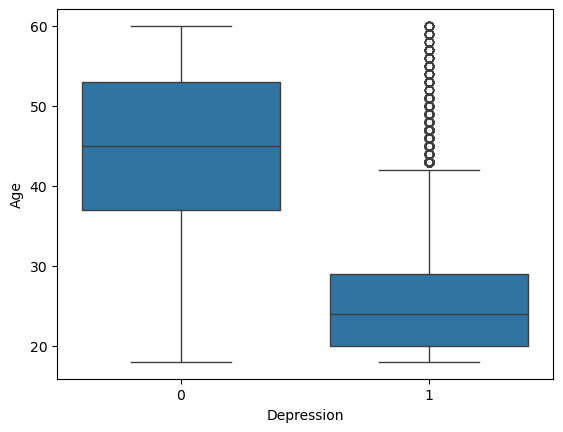

In [799]:
sns.boxplot(data=df_train, x="Depression", y="Age")

<div class="alert alert-success">

It is noticeable how younger people is more prone to depression, according to this data.

Outlier-wise the values are quite centered.

</div>

<Axes: xlabel='Depression', ylabel='Academic Pressure'>

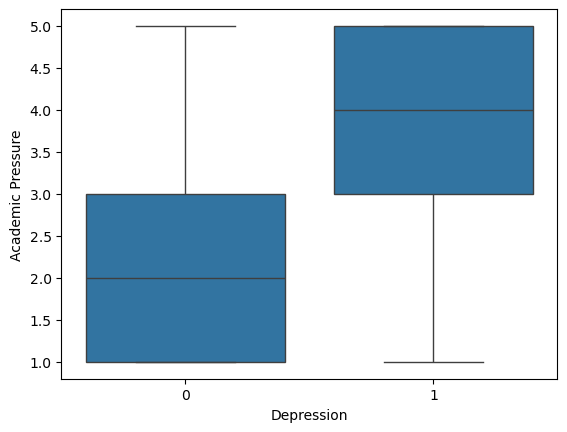

In [800]:
sns.boxplot(data=df_train, x="Depression", y="Academic Pressure")

<Axes: xlabel='Depression', ylabel='Work Pressure'>

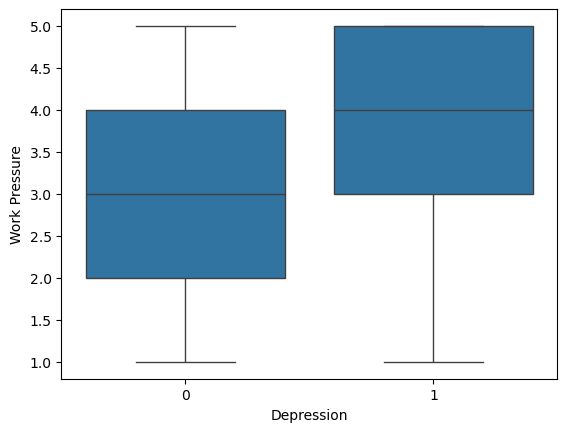

In [801]:
sns.boxplot(data=df_train, x="Depression", y="Work Pressure")

<Axes: xlabel='Depression', ylabel='Age'>

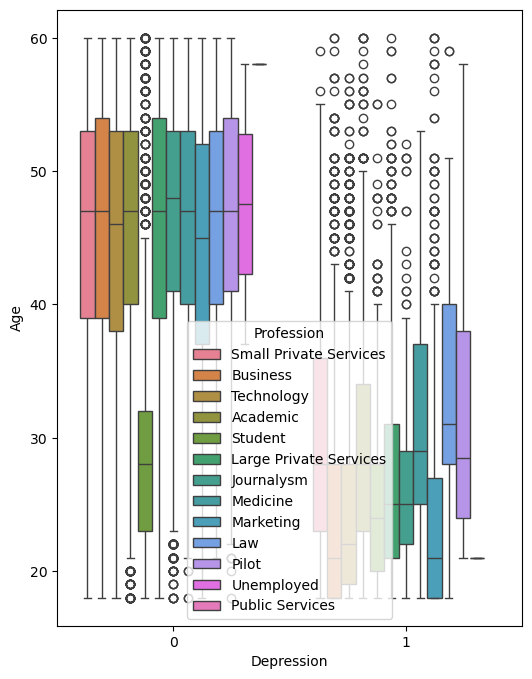

In [802]:
plt.figure(figsize=(6, 8))
sns.boxplot(data=df_train_NaN, x="Depression", y="Age", hue="Profession")

## Encoding

In [803]:
from sklearn.preprocessing import OrdinalEncoder

In [804]:
def encode(df):
    ordinalencoder = OrdinalEncoder()
    data = ordinalencoder.fit_transform(df)

    return pd.DataFrame(data, columns=df.columns)

In [805]:
df_train_encoded = encode(df_train_NaN)
df_train_encoded.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0.0,31.0,15.0,9.0,0.0,5.0,0.0,0.0,2.0,3.0,0.0,9.0,0.0,1.0,1.0,0.0,0.0
1,1.0,8.0,27.0,0.0,0.0,4.0,0.0,0.0,3.0,2.0,2.0,12.0,1.0,7.0,2.0,0.0,1.0
2,1.0,15.0,29.0,10.0,5.0,0.0,5.0,2.0,0.0,0.0,0.0,3.0,1.0,3.0,0.0,0.0,1.0
3,1.0,4.0,17.0,0.0,0.0,5.0,0.0,0.0,1.0,2.0,1.0,6.0,1.0,10.0,0.0,1.0,1.0
4,0.0,12.0,12.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,6.0,1.0,9.0,3.0,1.0,0.0


In [806]:
df_test_encoded = encode(df_test_NaN)
df_test_encoded.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,1.0,35.0,67.0,12.0,0.0,2.0,0.0,0.0,5.0,8.0,9.0,53.0,0.0,9.0,2.0,1.0
1,0.0,40.0,25.0,2.0,0.0,2.0,0.0,0.0,4.0,8.0,9.0,16.0,0.0,6.0,3.0,0.0
2,1.0,35.0,21.0,0.0,0.0,4.0,0.0,0.0,1.0,5.0,9.0,12.0,1.0,12.0,3.0,0.0
3,0.0,5.0,47.0,10.0,5.0,0.0,3.0,1.0,0.0,10.0,9.0,35.0,1.0,10.0,3.0,0.0
4,1.0,29.0,22.0,7.0,0.0,5.0,0.0,0.0,5.0,5.0,9.0,28.0,1.0,3.0,3.0,0.0


# MODELING

## Feature and target separation

In [807]:
X_train = df_train_encoded.drop('Depression', axis=1)
y_train = df_train_encoded['Depression']

In [808]:
X_test = df_test_encoded

## Scaling

In [809]:
from sklearn.preprocessing import MinMaxScaler

In [810]:
scaler = MinMaxScaler()

In [811]:
scaled_X_train = scaler.fit_transform(X_train)

In [812]:
scaled_X_test = scaler.transform(X_test)

## Tensorflow NN

In [813]:
df_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140436 entries, 0 to 140435
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 140436 non-null  float64
 1   Age                                    140436 non-null  float64
 2   City                                   140436 non-null  float64
 3   Profession                             140436 non-null  float64
 4   Academic Pressure                      140436 non-null  float64
 5   Work Pressure                          140436 non-null  float64
 6   CGPA                                   140436 non-null  float64
 7   Study Satisfaction                     140436 non-null  float64
 8   Job Satisfaction                       140436 non-null  float64
 9   Sleep Duration                         140436 non-null  float64
 10  Dietary Habits                         140436 non-null  

In [814]:
import tensorflow as tf
from tensorflow import keras

In [815]:
model = keras.Sequential([
    keras.layers.Input((16,)),
    keras.layers.Dense(64, activation='relu'),  # hidden layer (2) with input layer (1)
    keras.layers.Dense(1, activation='sigmoid')  # output layer (3)
	])	

In [816]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [817]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [818]:
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

In [819]:
def stratified_modeling(model, n_splits, epochs):
    y_test_pred = np.zeros(len(scaled_X_test))
    accu_values = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        print(f"FOLD: {fold + 1}\n")
        
        X_train_fold, X_val_fold = scaled_X_train[train_index], scaled_X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        print(f"Fitting {epochs} epochs...")
        model.fit(X_train_fold, y_train_fold, epochs)
        
        print("Predicting validation results...")
        y_val_pred_fold = model.predict(X_val_fold)
        binary_val_preds = tf.cast(y_val_pred_fold >= 0.5, tf.int32)
        
        print(classification_report(y_val_fold, binary_val_preds))
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_val_fold, binary_val_preds)).plot()
        plt.show()

        print("Evaluatin metrics...")
        fold_loss, fold_acc = model.evaluate(X_val_fold, y_val_fold, verbose=1)

        accu_values.append(fold_acc)
        
        print("Predicting test results...")
        y_test_pred_fold = model.predict(scaled_X_test)
        y_test_pred += y_test_pred_fold.reshape(len(y_test_pred_fold)) / n_splits

        print("\n")
    
    return accu_values, y_test_pred

FOLD: 1

Fitting 5 epochs...
22470/22470 ━━━━━━━━━━━━━━━━━━━━ 13s 528us/step - accuracy: 0.9281 - loss: 0.1785
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.84      0.80      0.82      5102

    accuracy                           0.94     28088
   macro avg       0.90      0.88      0.89     28088
weighted avg       0.94      0.94      0.94     28088



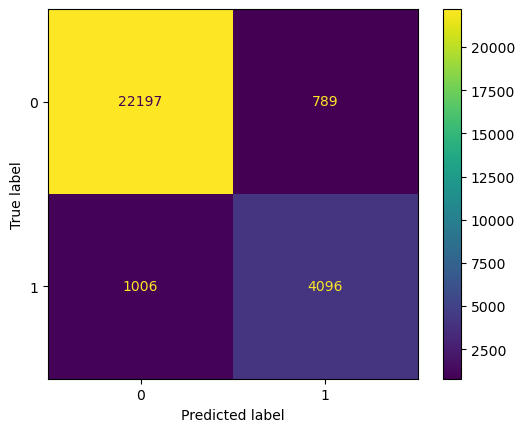

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.9357 - loss: 0.1580
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step


FOLD: 2

Fitting 5 epochs...
22470/22470 ━━━━━━━━━━━━━━━━━━━━ 12s 555us/step - accuracy: 0.9350 - loss: 0.1591
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.85      0.80      0.83      5101

    accuracy                           0.94     28087
   macro avg       0.91      0.89      0.90     28087
weighted avg       0.94      0.94      0.94     28087



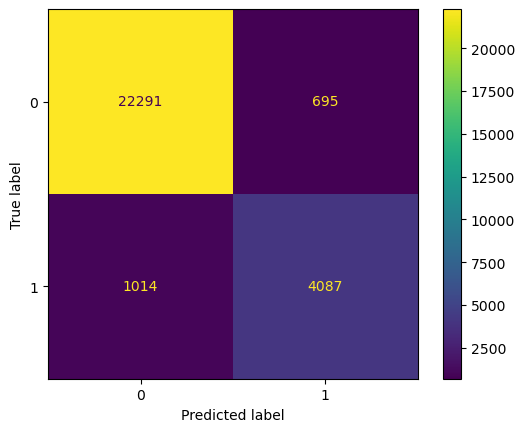

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.9404 - loss: 0.1486
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step


FOLD: 3

Fitting 5 epochs...
22470/22470 ━━━━━━━━━━━━━━━━━━━━ 13s 581us/step - accuracy: 0.9353 - loss: 0.1587
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.84      0.81      0.82      5101

    accuracy                           0.94     28087
   macro avg       0.90      0.89      0.89     28087
weighted avg       0.94      0.94      0.94     28087



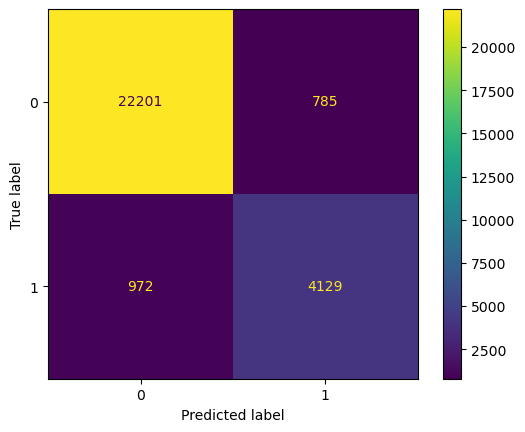

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.9351 - loss: 0.1556
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step


FOLD: 4

Fitting 5 epochs...
22470/22470 ━━━━━━━━━━━━━━━━━━━━ 14s 618us/step - accuracy: 0.9372 - loss: 0.1560
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     22986
         1.0       0.85      0.79      0.82      5101

    accuracy                           0.94     28087
   macro avg       0.90      0.88      0.89     28087
weighted avg       0.93      0.94      0.94     28087



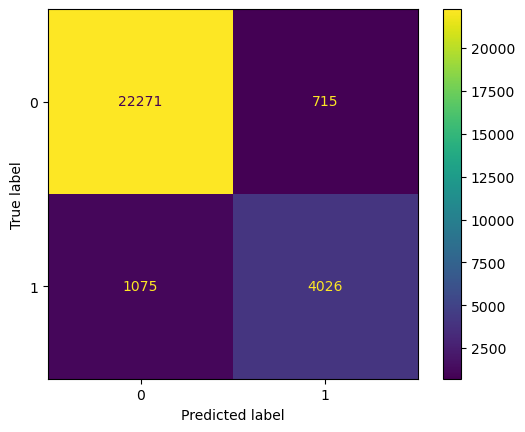

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9321 - loss: 0.1634
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step


FOLD: 5

Fitting 5 epochs...
22470/22470 ━━━━━━━━━━━━━━━━━━━━ 13s 563us/step - accuracy: 0.9367 - loss: 0.1576
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     22986
         1.0       0.83      0.81      0.82      5101

    accuracy                           0.94     28087
   macro avg       0.90      0.89      0.89     28087
weighted avg       0.94      0.94      0.94     28087



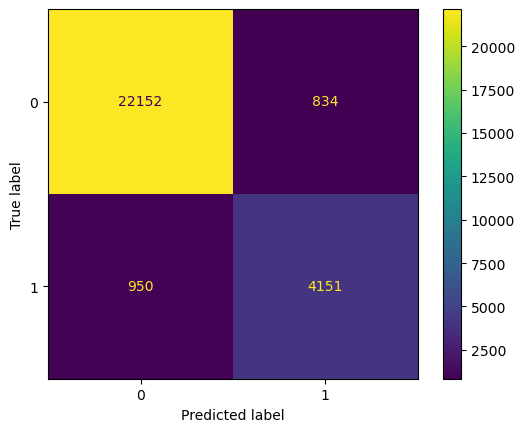

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.9344 - loss: 0.1606
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step




In [820]:
epochs = 5

accu_values, y_test_pred = stratified_modeling(model, n_splits, epochs)

In [821]:
accuracy = np.mean(accu_values)
print(f"{color.BOLD}The overall accuracy is:{color.END} {accuracy}")

The overall accuracy is: 0.9370887994766235


In [822]:
binary_test_preds = tf.cast(y_test_pred >= 0.5, tf.int32)

## Possible improvements

After submiting the final predictions I got a smaller accuracy score of 0.79546. This may have happened as a result of overfitting. Let's try and/or reduce the epochs and n_splits.

FOLD: 1

Fitting 3 epochs...
37450/37450 ━━━━━━━━━━━━━━━━━━━━ 21s 572us/step - accuracy: 0.9366 - loss: 0.1562
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.84      0.80      0.82      5102

    accuracy                           0.94     28088
   macro avg       0.90      0.88      0.89     28088
weighted avg       0.94      0.94      0.94     28088



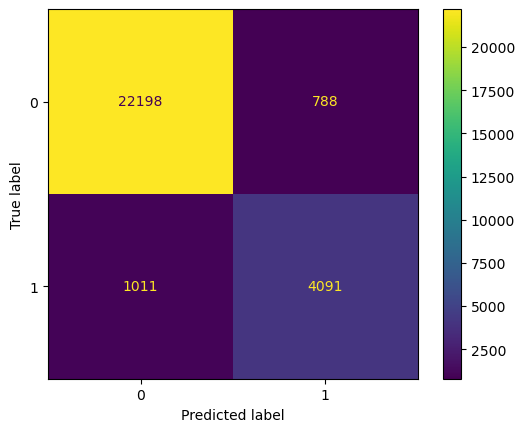

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - accuracy: 0.9361 - loss: 0.1561
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step


FOLD: 2

Fitting 3 epochs...
37450/37450 ━━━━━━━━━━━━━━━━━━━━ 21s 562us/step - accuracy: 0.9377 - loss: 0.1559
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.84      0.82      0.83      5101

    accuracy                           0.94     28087
   macro avg       0.90      0.89      0.90     28087
weighted avg       0.94      0.94      0.94     28087



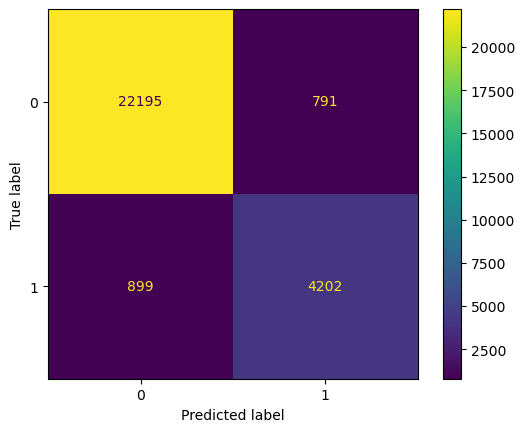

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.9412 - loss: 0.1478
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step


FOLD: 3

Fitting 3 epochs...
37450/37450 ━━━━━━━━━━━━━━━━━━━━ 22s 591us/step - accuracy: 0.9379 - loss: 0.1553
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.84      0.82      0.83      5101

    accuracy                           0.94     28087
   macro avg       0.90      0.89      0.89     28087
weighted avg       0.94      0.94      0.94     28087



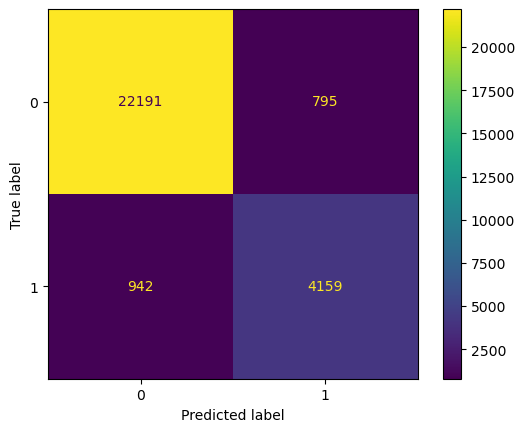

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.9363 - loss: 0.1543
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step


FOLD: 4

Fitting 3 epochs...
37450/37450 ━━━━━━━━━━━━━━━━━━━━ 21s 560us/step - accuracy: 0.9377 - loss: 0.1556
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.84      0.80      0.82      5101

    accuracy                           0.94     28087
   macro avg       0.90      0.88      0.89     28087
weighted avg       0.94      0.94      0.94     28087



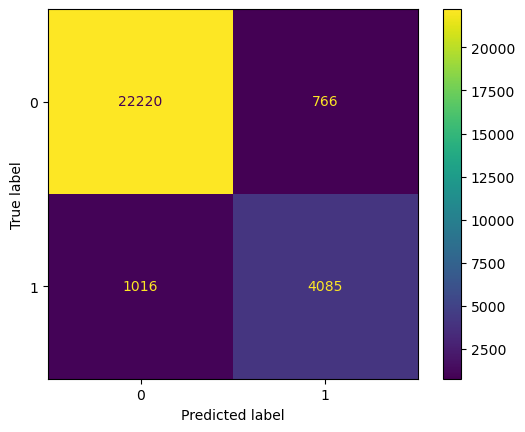

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9332 - loss: 0.1627
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step


FOLD: 5

Fitting 3 epochs...
37450/37450 ━━━━━━━━━━━━━━━━━━━━ 20s 541us/step - accuracy: 0.9363 - loss: 0.1565
Predicting validation results...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96     22986
         1.0       0.85      0.80      0.82      5101

    accuracy                           0.94     28087
   macro avg       0.90      0.88      0.89     28087
weighted avg       0.94      0.94      0.94     28087



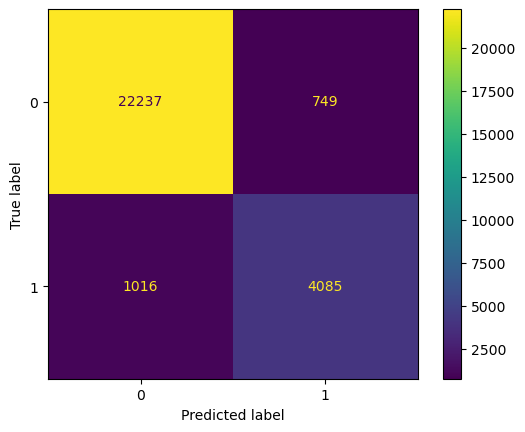

Evaluatin metrics...
878/878 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.9356 - loss: 0.1602
Predicting test results...
2932/2932 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step




In [823]:
epochs = 3

accu_values, y_test_pred = stratified_modeling(model, n_splits, epochs)

In [824]:
accuracy = np.mean(accu_values)
print(f"{color.BOLD}The overall accuracy is:{color.END} {accuracy}")

The overall accuracy is: 0.937530267238617


In [825]:
binary_test_preds = tf.cast(y_test_pred >= 0.5, tf.int32)

# SUBMISSION

In [826]:
def submit(predictions):
    df_sub['Depression'] = predictions
    df_sub.to_csv('submission.csv', index = False)
    print(f"{color.BOLD}The file contains the following:{color.END} \n\n{pd.read_csv('submission.csv')}")

In [827]:
submit(binary_test_preds)

The file contains the following: 

           id  Depression
0      140700           0
1      140701           0
2      140702           1
3      140703           1
4      140704           0
...       ...         ...
93795  234495           0
93796  234496           1
93797  234497           0
93798  234498           1
93799  234499           0

[93800 rows x 2 columns]
